# High Resolution Demographic Algeria

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet, warnings
import geopandas as gpd

In [4]:
'''
Source: 
https://dataforgood.fb.com/tools/population-density-maps/
https://data.humdata.org/dataset/highresolutionpopulationdensitymaps-dza
''';

In [5]:
data = pd.read_csv('C:/Users/Taha/Desktop/Facebook Algeria/Density Maps/population_dza_2018_10_01.csv')
gdf = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data.Lon, data.Lat))

# https://www.diva-gis.org/datadown
algeria = gpd.read_file('C:/Users/Taha/Desktop/Facebook Algeria/DZA_GEO/DZA_adm2.shp')
provences = algeria.dissolve(by='NAME_1')
provences = provences.reset_index()

In [6]:
'''
import folium, warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
stations = gdf[:20000]
mapping = folium.Map(location=[stations.geometry[0].x, stations.geometry[0].y],
                     zoom_start=4, tiles='CartoDB positron')
for i in range(len(stations)):
    folium.Circle([stations.geometry[i].x, stations.geometry[i].y], radius=100, 
                  color='#DC7633', fill=True).add_to(mapping)
mapping''';

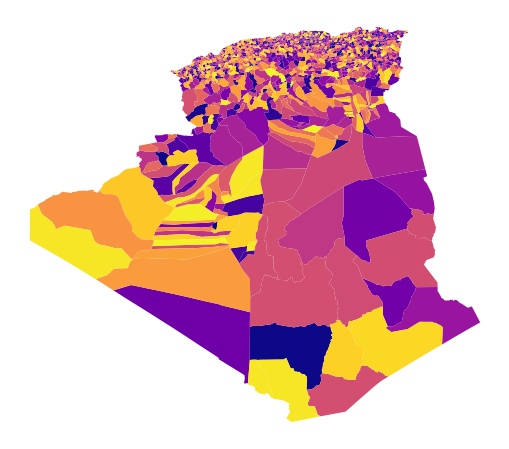

In [7]:
algeria.plot(cmap='plasma', column='NAME_2', figsize=(10, 8))
plt.axis('off');

In [8]:
'''
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_aspect('equal')
algeria[algeria.NAME_1=='Alger'].plot(ax=ax, color='white', edgecolor='black')
gdf[200000:1000000].plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()''';

# Algiers

In [ ]:
alger = []
commune = provences[provences.NAME_1=='Alger'].geometry
for i in range(10**5, 11*10**5):
    if i%10**5==0: print(i/10**4,'% Done')
    if commune.contains(gdf.iloc[i].geometry)[1]: alger.append(gdf.iloc[i])

In [ ]:
alger = gpd.GeoDataFrame(alger)

In [ ]:
alger = alger.reset_index(drop=True)

In [ ]:
#alger = pd.read_csv('C:/Users/Taha/Desktop/Facebook Algeria/Density Maps/Alger.csv')
#alger = gpd.GeoDataFrame(alger)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_aspect('equal')
algeria[algeria.NAME_1=='Alger'].plot(ax=ax, color='white', edgecolor='lightgrey')
alger.plot(ax=ax, marker='h', markersize=1, column='Population', cmap='plasma')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_aspect('equal')
algeria[algeria.NAME_1=='Alger'].plot(ax=ax, color='white', edgecolor='black', alpha=.5)
alger.plot(ax=ax, marker='o', markersize=.1, column='Population', cmap='hot_r', vmin=0)
plt.show()

In [ ]:
alger['geoid'] = alger.index.astype(str)
alger['locations'] = list(zip(alger.Lat, alger.Lon, alger.Population))
alger.head(2)

In [ ]:
alger

In [ ]:
from folium.plugins import HeatMap

# Create a Map instance
m = folium.Map(location=[36.820139, 3.009861], tilesf = 'stamentoner', zoom_start=12, control_scale=True)

# Add heatmap to map instance
# Available parameters:
#HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, 
#radius=25, blur=15, gradient=None, overlay=True, control=True, show=True)
HeatMap(alger.locations, radius=7).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

# Alternative syntax:
#m.add_child(HeatMap(points_array, radius=15))

# Show map
m#.save('alger_heatmap.html')

# Southern Region

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_aspect('equal')
algeria.plot(ax=ax, color='white', edgecolor='lightgrey')
gdf[45*10**5:48*10**5].plot(ax=ax, marker='h', markersize=5, column='Population', cmap='plasma', alpha=.5)
plt.show()

In [ ]:
# Look for the seven castles [plot time with what they would look like at night]
np.unique(algeria[algeria.NAME_1=='Ghardaïa'].NAME_2)

In [9]:
castles = ['Ghardaia']#, 'Berriane', 'Bounoura', 'El Atteuf', 'El Guerrarra']

In [10]:
ghardaia = []
commune = algeria[algeria['NAME_2'].isin(castles)].geometry
for i in range(45*10**5, 48*10**5):
    if (commune.contains(gdf.iloc[i].geometry)).any(): ghardaia.append(gdf.iloc[i])
        
ghardaia = gpd.GeoDataFrame(ghardaia)
ghardaia = ghardaia.reset_index(drop=True)

In [11]:
#fig, ax = plt.subplots(figsize=(15, 10))
#ax.set_aspect('equal')
#algeria[algeria['NAME_2'].isin(castles)].plot(ax=ax, edgecolor='black', alpha=.5)
#ghardaia.plot(ax=ax, marker='o', markersize=1, column='Population', cmap='hot_r')
#plt.show()
'''
ghardaia.plot(column='Population', cmap='hot_r')
warnings.simplefilter(action='ignore', category=UserWarning)
mplleaflet.display()''';
ghardaia

,Lat,Lon,Population,geometry
0,32.698472,3.735417,24.57134,POINT (3.73542 32.69847)
1,32.693750,3.729583,24.57134,POINT (3.72958 32.69375)
2,32.692361,3.729583,24.57134,POINT (3.72958 32.69236)
3,32.686528,3.730417,24.57134,POINT (3.73042 32.68653)
4,32.668750,3.732917,24.57134,POINT (3.73292 32.66875)
...,...,...,...,...
4035,32.482083,3.677917,24.57134,POINT (3.67792 32.48208)
4036,32.481806,3.677639,24.57134,POINT (3.67764 32.48181)
4037,32.481528,3.677639,24.57134,POINT (3.67764 32.48153)
4038,32.481250,3.675972,24.57134,POINT (3.67597 32.48125)


In [14]:
ghardaia.to_csv('C:/Users/Taha/Desktop/Facebook Algeria/Density Maps/Ghardaia.csv', index=False)

In [15]:
'''
import folium
mapping = folium.Map(location = [32.630417, 3.705972], zoom_start = 10, tiles = 'Stamen Toner')
feature_group = folium.FeatureGroup("Locations")

for lat, lon, pop in zip(ghardaia.Lat, ghardaia.Lon, ghardaia.Population):
    feature_group.add_child(folium.Circle(location=[lat, lon], radius=pop))

mapping.add_child(feature_group)''';

In [ ]:
gdf['locations'] = list(zip(gdf.Lat, gdf.Lon, gdf.Population))

In [ ]:
#from folium.plugins import HeatMap

# Create a Map instance
Map = folium.Map(location=[36.820139, 3.009861], tiles = 'cartodbpositron', zoom_start=5, control_scale=True)

# Add heatmap to map instance
# Available parameters:
#HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, 
#radius=25, blur=15, gradient=None, overlay=True, control=True, show=True)
HeatMap(gdf.locations, radius=7).add_to(folium.FeatureGroup(name='Heat Map').add_to(Map))
folium.LayerControl().add_to(Map)

# Alternative syntax:
#m.add_child(HeatMap(points_array, radius=15))

# Show map
Map.save('Algeria_Population_Heatmap_2.html')